- tokenising dataframe
- only choose those columns that are believed to make a difference to classification of topic given a question
- removed all non-alphabet characters

In [1]:
import pandas as pd
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
import numpy as np
import re

In [2]:
allDataPath = '../Data/full-cleaned-pandas-ready-data-set.csv'
allData = pd.read_csv(allDataPath, index_col='index')

In [3]:
allData.sample(2)

,questionDescription,question,options,answer,qNumber,qOrigin,qTopic,answerNumber,answerDescription,file,option1,option2,option3,option4,option5
index,,,,,,,,,,,,,,,
2709,A 24-year-old girl with Down syndrome is found...,What is the most common cardiac defect seen in...,"{'1': 'Endocardial cushion defect', '2': 'Mitr...",Answer & Comments Answer: 1- Endocardial cush...,234.0,OnExamination,Cardiology,1.0,Answer & Comments Answer: 1- Endocardial cush...,2,Endocardial cushion defect,Mitral regurgitation,Patent ductus arteriosus,Secundum atrial septal defect,Ventricular septal defect
8962,A 17-year-old male is admitted to the Emergenc...,Which of the following is best representative ...,"{'1': 'It replenishes cysteine', '2': 'It depl...",Answer & Comments Answer: 3- It replenishes g...,1903.0,PasTest 2009,Clinical pharmacology,3.0,Answer & Comments Answer: 3- It replenishes g...,4,It replenishes cysteine,It depletes cysteine,It replenishes glutathione,It depletes glutathione,It replenishes cysteine


## create tokenised version of allData df

In [4]:
# the extra stopwords come from looking at the frequency distribution of the entire dataset of words
english_stop_words=stopwords.words("english")+list(string.punctuation)+[
    'answer','comments','presents','mmoll',
    'year','old','x','l','also','reveals','following',
    'likely','would', 'yearold', 'examination', 'history', 
    'patient', 'mmhg', 'may', 'patients', 'disease', 
    'associated', 'syndrome', 
]

# functions
# tokenize and filter by stopword string
def tokenize(inputString):
    tokenizedList = word_tokenize(inputString)
    filteredList = [filtered for filtered in tokenizedList if filtered not in english_stop_words]
    return filteredList

In [5]:
# fill nan's with 'none' 
allData = allData.fillna('none')
# lower case all words
allData = allData.apply(lambda x: x.astype(str).str.lower())
allData = allData.apply(lambda x: x.astype(str).str.replace('-', ' '))
allData = allData.apply(lambda x: x.astype(str).str.replace('[^a-z\s]', ''))
# tokenize all columns
allDataTokenized = pd.DataFrame()
for column in ['questionDescription', 'question',
               'qTopic', 'answerDescription', 
               'option1', 'option2', 'option3', 
               'option4', 'option5']:
    allDataTokenized[column] = allData[column].apply(tokenize)

In [6]:
allDataTokenized.sample(3)

,questionDescription,question,qTopic,answerDescription,option1,option2,option3,option4,option5
index,,,,,,,,,
9766,"[anxious, saleswoman, presented, mild, shortne...",[diagnosis],[respiratory],"[myasthenia, gravis, case, myasthenia, gravis,...",[angina],[eatonlambert],"[myasthenia, gravis]","[somatisation, disorder]",[tia]
19373,"[admitted, decompensated, liver, tense, ascite...","[given, diagnosis, treatment, initiated]","[past, paper]","[terlipressin, albumin]","[terlipressin, albumin]",[albumin],"[increased, rate, iv, fluids]",[terlipressin],"[broad, spectrum, antibiotics]"
4879,"[man, abdominal, pain, stiffness, muscle, spas...","[appropriate, next, intervention]",[endocrinology],"[human, tetanus, immunoglobulin, iv, debrideme...","[human, tetanus, immunoglobulin, iv]","[immediate, debridement, wound]","[local, application, tetanus, toxoid]","[metronidazole, iv]","[penicillin, iv]"


In [7]:
allDataTokenized.to_csv('../data/tokenized-data.csv')

In [9]:
allDataTokenized.qTopic.value_counts()

[past, paper]               1626
[endocrinology]             1286
[basic, science]            1241
[cardiology]                1120
[neurology]                 1009
[rheumatology]               952
[respiratory]                952
[gastroenterology]           925
[haematology]                912
[nephrology]                 791
[infectious]                 692
[clinical, pharmacology]     664
[psychiatry]                 469
[dermatology]                363
[statistics]                 261
[ophthalmology]              201
[emergency, medicine]        165
[general, revision]          136
[misc]                       132
[tropical, medicine]         119
[pharmacology]                98
[medicine]                    46
[ethics, law]                 26
Name: qTopic, dtype: int64

## Populating stop words list

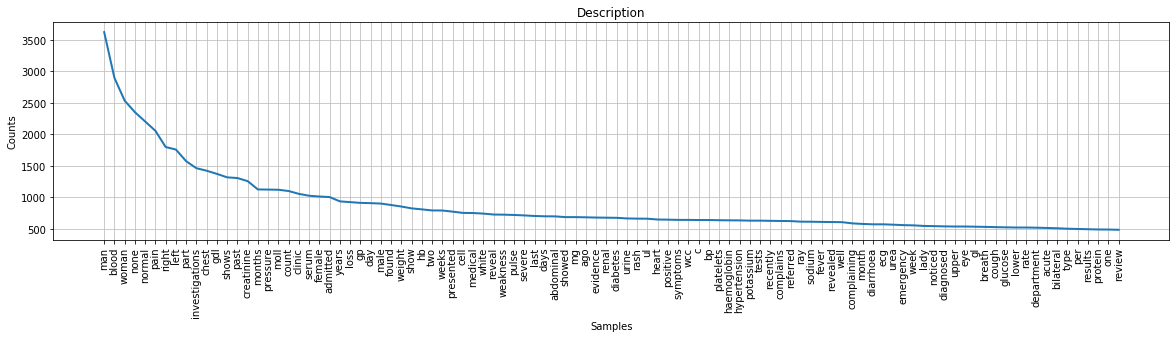

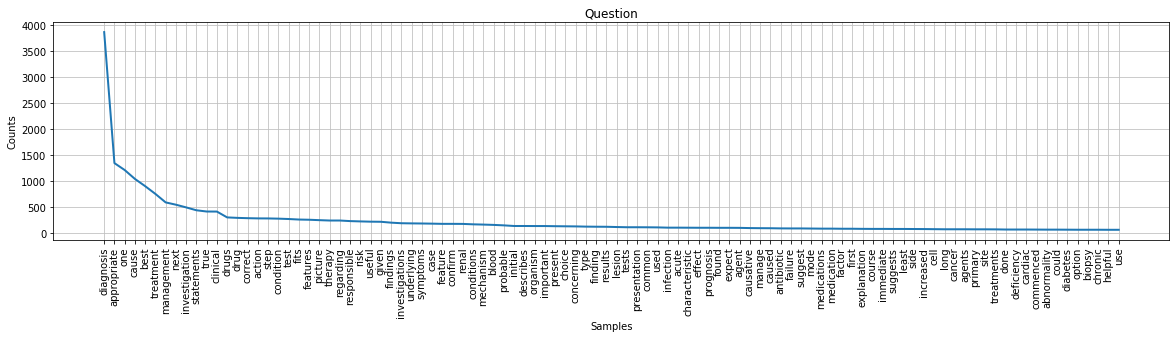

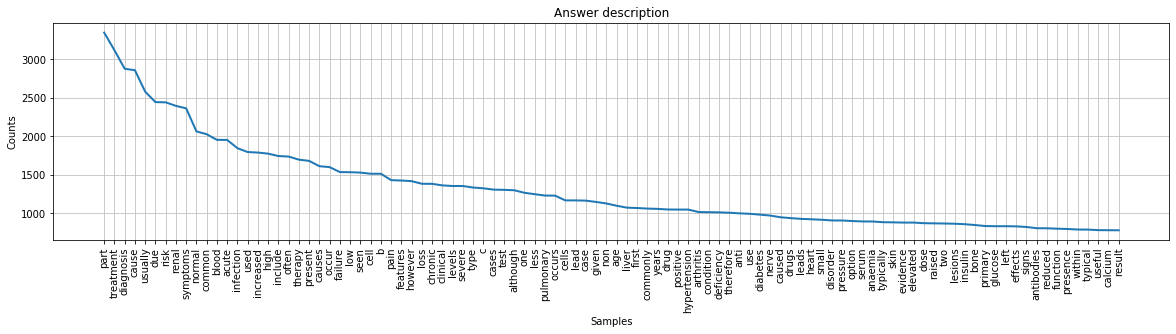

In [8]:
# investigating stop words
def FilterStopwords(tokenizedList, stopwordsList):
    filtered=[]
    for w in tokenizedList:
        if w not in stopwordsList:
            filtered.append(w)
    return filtered

# get a frequency distribution of the words in the whole data set

# will need to concatenate all the words in the 
questionDescription = word_tokenize(' '.join(allData.questionDescription))
question = word_tokenize(' '.join(allData.question))
answerDescription = word_tokenize(' '.join(allData.answerDescription))

# now remove the stopwords
questionDescriptionFiltered = FilterStopwords(questionDescription, english_stop_words)
questionFiltered = FilterStopwords(question, english_stop_words)
answerDescriptionFiltered = FilterStopwords(answerDescription, english_stop_words)

for i,j in zip([questionDescriptionFiltered, questionFiltered, answerDescriptionFiltered], 
               ['Description', 'Question', 'Answer description']):
    fdist = FreqDist(i)
    plt.figure(figsize=(20,4))
    plt.title(j)
    fdist.plot(100, cumulative=False)
    plt.show()